For this project, I will analyze YouBike dataset provided by New Taipei City Government.
  (https://data.gov.tw/dataset/28318)


The data contains the following fields: (I translated all into English)
  
  

| Columns Name | Description|
|------|------|
| sno |ID number of YouBike Station|
| sna |Chinese Station Name|
| tot |Station Total Parking Space|
| sbi |Number of availble YouBikes|
| sarea|Chinese Station Area|
| mday|Data Update Time|
| lat|Latitude|
| lng|Longtitude|
| ar|Chinese Address|
| sareaen|English Station Area|
| snaen|English Station Name|
| aren|English Address|
| bemp|Available Parking Space|
| act|Whether the station is in operation or not|


Let's import libraries first

In [28]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas_profiling

In [29]:
df = pd.read_csv('/Users/David_Tsai/Downloads/youbike.csv')

In [30]:
profile = pandas_profiling.ProfileReport(df)
display(profile)

Number of variables,14
Number of observations,548
Total Missing (%),0.0%
Total size in memory,60.0 KiB
Average record size in memory,112.1 B
Numeric,7
Categorical,3
Boolean,1
Date,0
Text (Unique),3
Rejected,0


Check how many stations are still in operation?

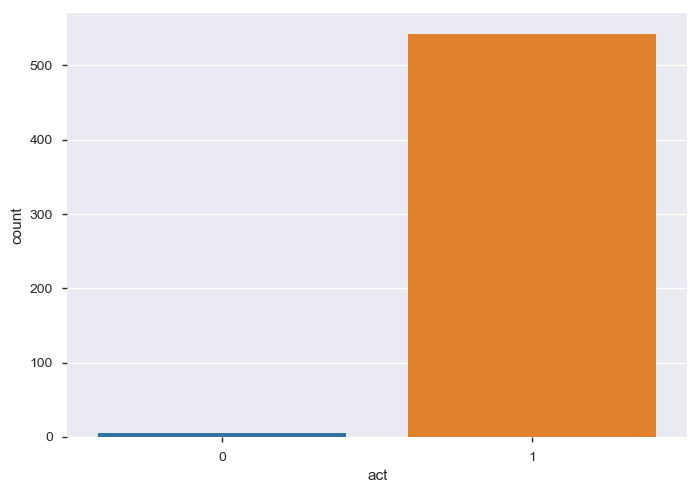

In [31]:
sns.countplot(x= 'act', data= df)

Draw a boxplot of variables that I want to analyze more

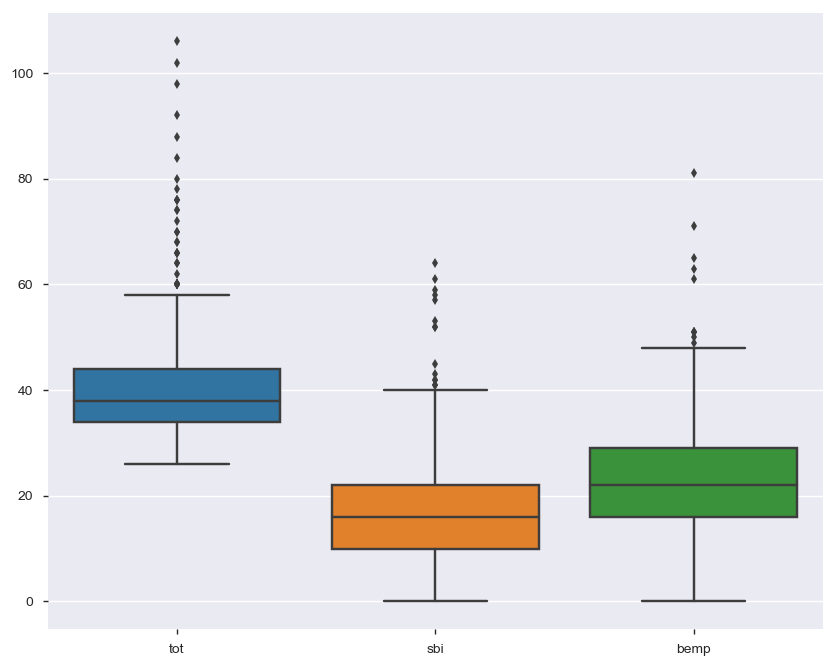

In [32]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data=df[['tot','sbi', 'bemp']])

Then do more data visualization

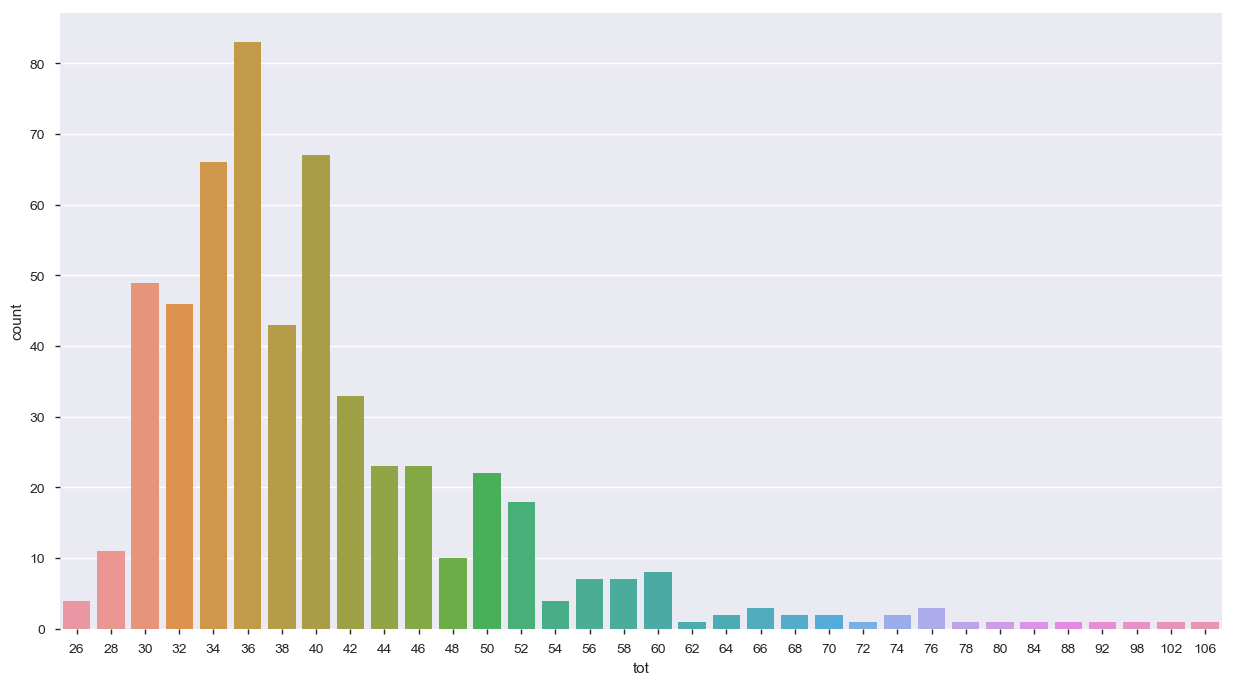

In [33]:
plt.figure(figsize=(15, 8))
tot = sns.countplot(x="tot", data=df)

How about the number of available YouBikes?

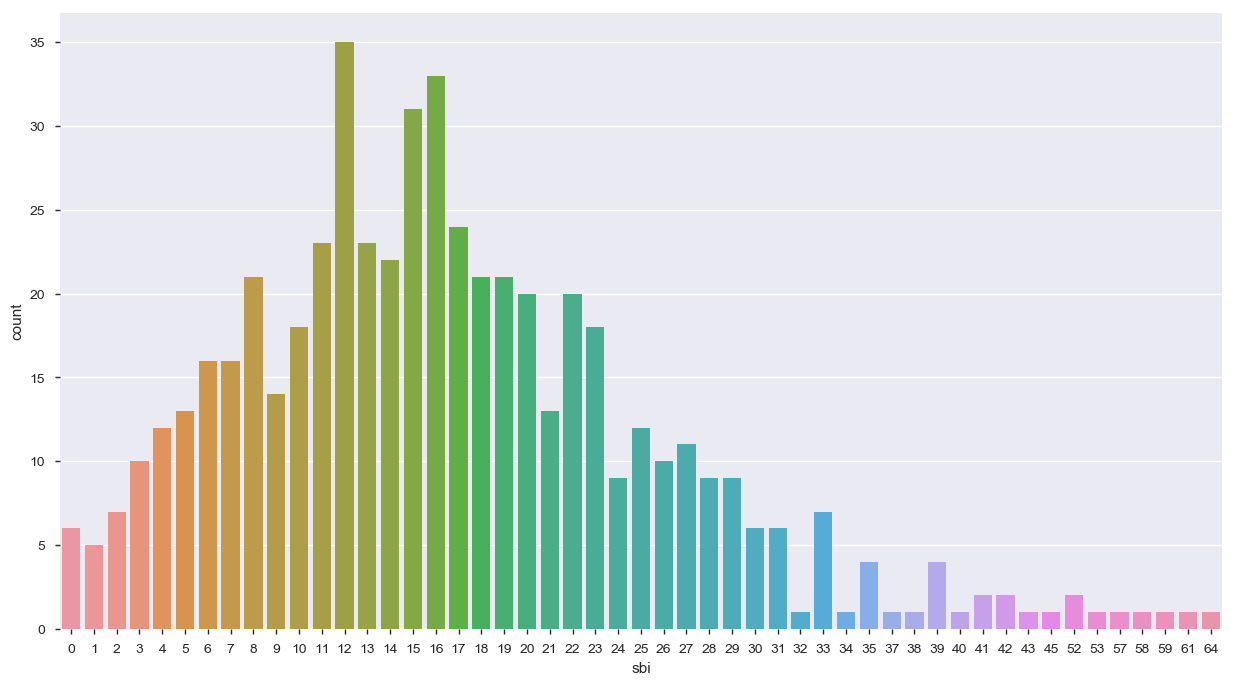

In [34]:
plt.figure(figsize=(15, 8))
tot = sns.countplot(x='sbi', data=df)

Then let's combine these two with joint plot.

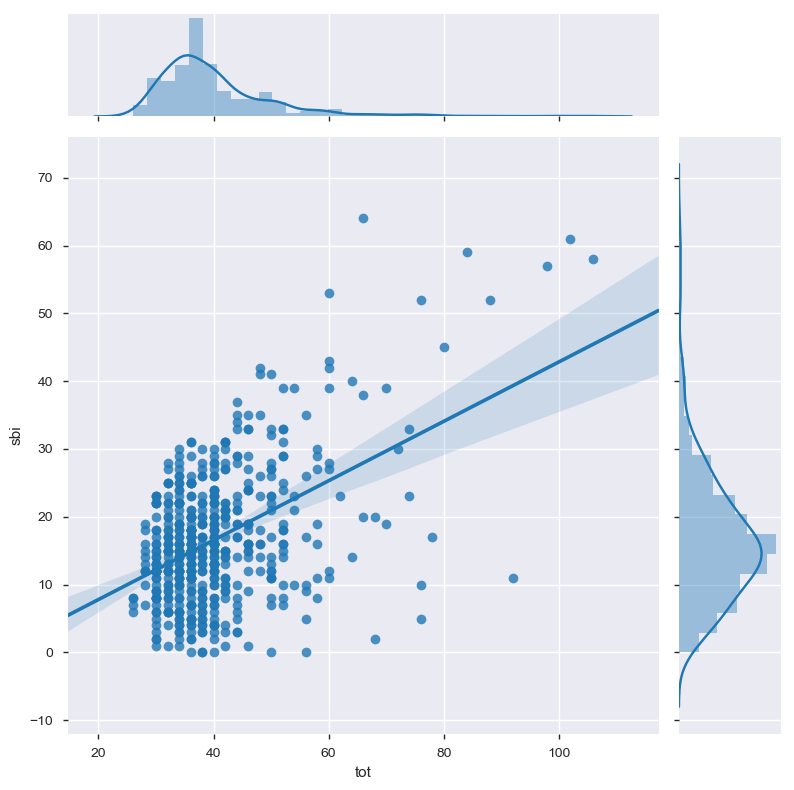

In [35]:
sns.jointplot(x="tot", y="sbi", data= df, kind ='reg', height = 8)

What if we take district into consideration?

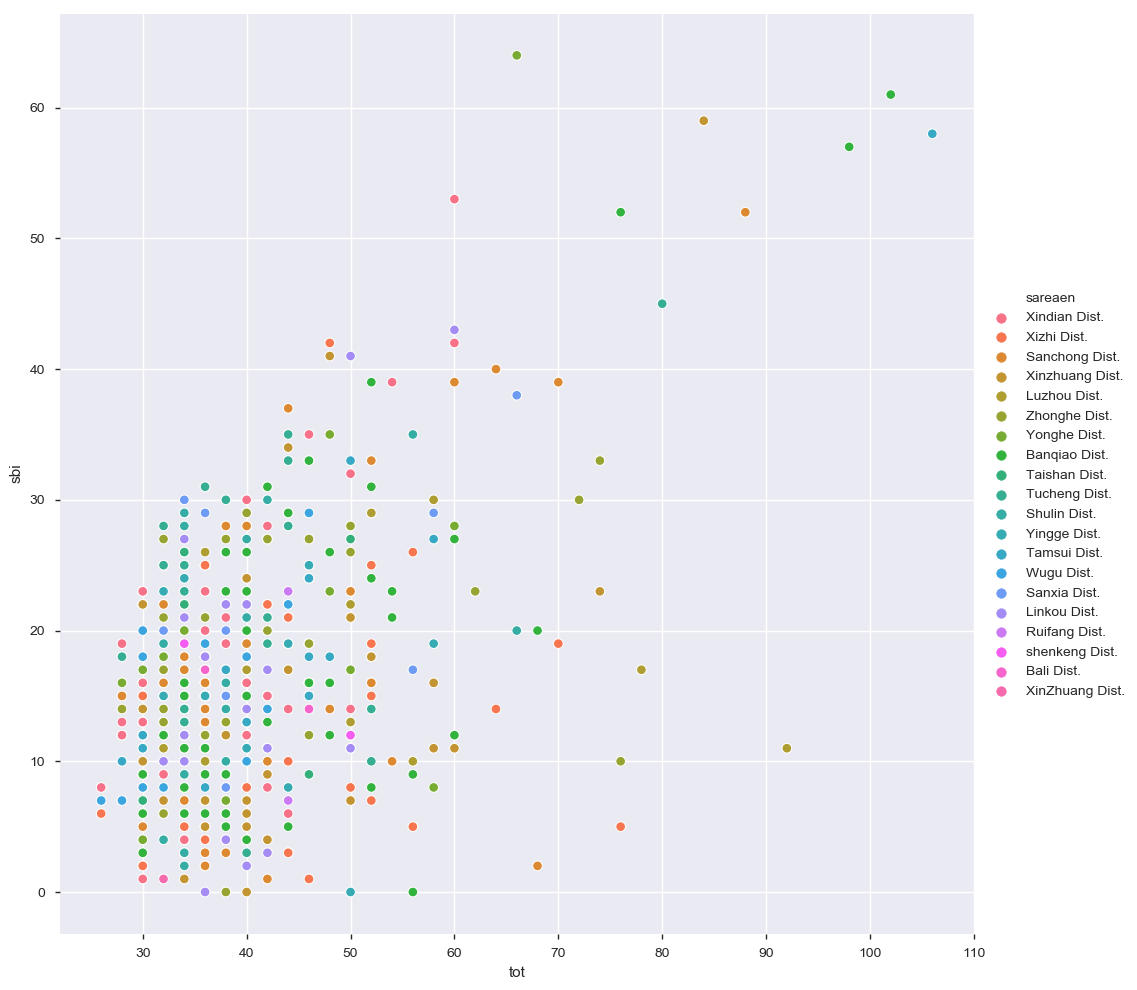

In [36]:
sns.relplot(x= 'tot', y= 'sbi', hue = 'sareaen', data = df, height = 10)

Speaking of distirct, let's see how many stations for each district in New Taipei City!

In [37]:
area_table = pd.DataFrame(df.groupby(['sarea']).sum())
area_table = area_table[['tot','sbi', 'bemp', 'act']]
area_table['new_col'] = range(1, len(area_table) + 1)
area_table = area_table.reset_index()
area_table.rename(columns={'sarea': 'TOWNNAME'}, inplace=True)
area_table = area_table[['TOWNNAME','tot','sbi', 'bemp', 'act']]
area_table

,TOWNNAME,tot,sbi,bemp,act
0,三峽區,676,323,349,17
1,三重區,2420,996,1400,59
2,中和區,1712,793,850,42
3,五股區,572,221,311,15
4,八里區,188,72,116,5
5,土城區,1212,619,592,31
6,新店區,1662,785,860,43
7,新莊區,2280,858,1415,55
8,板橋區,3604,1407,2119,84
9,林口區,972,356,573,24


In order to plot the result on the map, we need to import geopandas and the map of Taiwan.

In [38]:
import geopandas as gp
villages_shp = gp.read_file('/Users/David_Tsai/Downloads/map/TOWN_MOI_1080509.shp') #map of Taiwan
newtaipei_shp = villages_shp.query('COUNTYNAME=="新北市"') #map of New Taipei City

In [39]:
newtaipei_shp.head()

,TOWNID,TOWNCODE,COUNTYNAME,TOWNNAME,TOWNENG,COUNTYID,COUNTYCODE,geometry
213,F33,65000040,新北市,永和區,Yonghe District,F,65000,"POLYGON ((121.5123947940001 25.02174595900004,..."
214,F07,65000060,新北市,新店區,Xindian District,F,65000,"POLYGON ((121.6092225440001 24.96401839600009,..."
215,F19,65000130,新北市,土城區,Tucheng District,F,65000,"POLYGON ((121.4671417850001 24.99298475300009,..."
216,F04,65000140,新北市,蘆洲區,Luzhou District,F,65000,"POLYGON ((121.491140105 25.09476749800007, 121..."
217,F03,65000150,新北市,五股區,Wugu District,F,65000,"POLYGON ((121.4590200780001 25.11272426200009,..."


Merge two tables together!

In [40]:
newtaipei_shp = newtaipei_shp.merge(area_table, left_on='TOWNNAME', right_on = 'TOWNNAME')
newtaipei_shp

,TOWNID,TOWNCODE,COUNTYNAME,TOWNNAME,TOWNENG,COUNTYID,COUNTYCODE,geometry,tot,sbi,bemp,act
0,F33,65000040,新北市,永和區,Yonghe District,F,65000,"POLYGON ((121.5123947940001 25.02174595900004,...",976,446,514,25
1,F07,65000060,新北市,新店區,Xindian District,F,65000,"POLYGON ((121.6092225440001 24.96401839600009,...",1662,785,860,43
2,F19,65000130,新北市,土城區,Tucheng District,F,65000,"POLYGON ((121.4671417850001 24.99298475300009,...",1212,619,592,31
3,F04,65000140,新北市,蘆洲區,Luzhou District,F,65000,"POLYGON ((121.491140105 25.09476749800007, 121...",1080,396,674,25
4,F03,65000150,新北市,五股區,Wugu District,F,65000,"POLYGON ((121.4590200780001 25.11272426200009,...",572,221,311,15
5,F27,65000100,新北市,淡水區,Danshui District,F,65000,"POLYGON ((121.450669045 25.24424598900004, 121...",996,444,545,24
6,F21,65000120,新北市,瑞芳區,Ruifang District,F,65000,"POLYGON ((121.823493854 25.13601305700007, 121...",118,39,79,3
7,F02,65000170,新北市,林口區,Linkou District,F,65000,"POLYGON ((121.3709369520001 25.12842823900007,...",972,356,573,24
8,F32,65000230,新北市,八里區,Bali District,F,65000,"POLYGON ((121.4357293720001 25.16606711400004,...",188,72,116,5
9,F15,65000090,新北市,三峽區,Sanxia District,F,65000,"POLYGON ((121.407659574 24.95206866900008, 121...",676,323,349,17


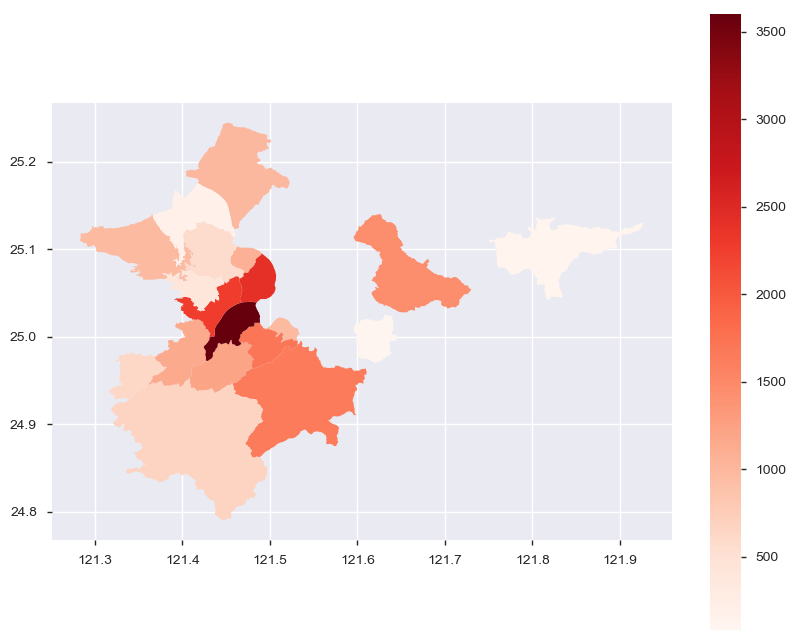

In [50]:
fig, ax = plt.subplots(1, figsize=(10, 8))
newtaipei_shp.plot(column = 'tot', linewidth=0.8, ax=ax, legend = True, cmap ='Reds')

We can see that:
1. There are some districts without YouBikes in New Taipei City (which are not shown on the map).
2. There are more youbikes in the district near Taipei City. WE can't tell the reasons right away. 
 However, I guess it's due to the transportation between two cities.

This data anlysis project ends here.